![image.png](attachment:image.png)

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

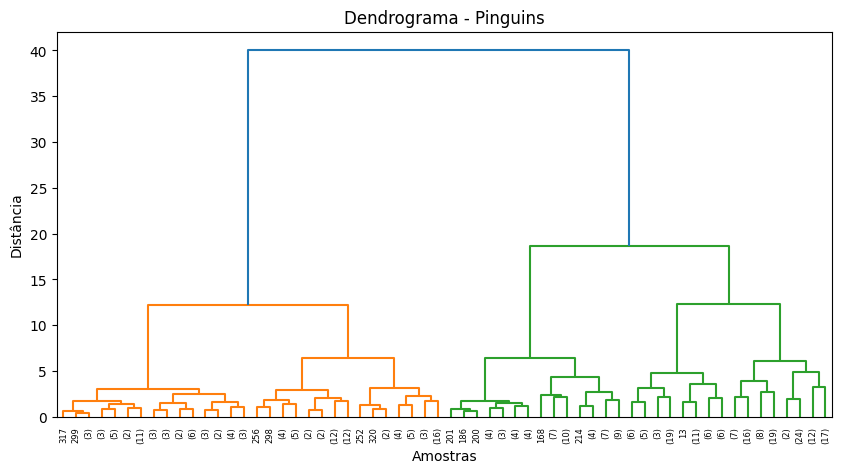

Quantidade de pinguins por espécie em cada grupo:
cluster3     1   2    3
species                
Adelie       0   0  151
Chinstrap    0  57   11
Gentoo     123   0    0

Médias das variáveis quantitativas por grupo:
          bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
cluster3                                                               
1              47.504878      14.982114         217.186992  5076.016260
2              49.752632      18.601754         197.105263  3810.087719
3              39.150000      18.287654         189.901235  3675.771605


In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Carregar base de pinguins
penguins = sns.load_dataset("penguins")

# Selecionar variáveis quantitativas
quant_vars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
df = penguins[quant_vars]

# Eliminar valores faltantes apenas dessas variáveis
df = df.dropna()

# Padronizar (média=0, desvio=1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Agrupamento hierárquico
Z = linkage(df_scaled, method="ward")

# Dendrograma
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Dendrograma - Pinguins")
plt.xlabel("Amostras")
plt.ylabel("Distância")
plt.show()

# Dividir em 3 grupos
clusters = fcluster(Z, 3, criterion="maxclust")

# Criar DataFrame limpo com os mesmos índices
penguins_clean = penguins.dropna(subset=quant_vars).copy()
penguins_clean["cluster3"] = clusters

# -----------------------------
# Avaliação dos grupos
# -----------------------------
print("Quantidade de pinguins por espécie em cada grupo:")
print(pd.crosstab(penguins_clean["species"], penguins_clean["cluster3"]))

print("\nMédias das variáveis quantitativas por grupo:")
print(penguins_clean.groupby("cluster3")[quant_vars].mean())

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

uantidade de pinguins por espécie em cada grupo:
cluster3     1   2    3
species                
Adelie       0   0  151
Chinstrap    0  57   11
Gentoo     123   0    0

Médias das variáveis quantitativas por grupo:
          bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
cluster3                                                               
1              47.504878      14.982114         217.186992  5076.016260
2              49.752632      18.601754         197.105263  3810.087719
3              39.150000      18.287654         189.901235  3675.771605

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

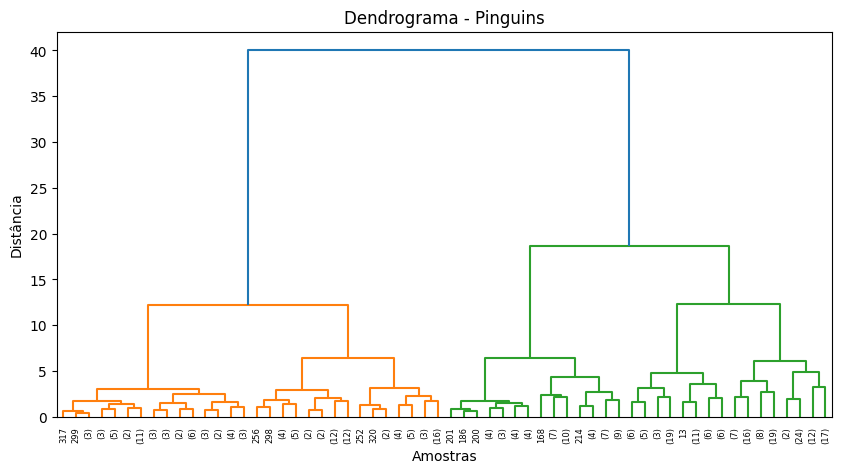

Espécies por grupo:
cluster5    1   2   3   4   5
species                      
Adelie      0   0   0  54  97
Chinstrap   0   0  57   3   8
Gentoo     52  71   0   0   0

Espécies e sexo por grupo:
cluster5           1   2   3   4   5
species   sex                       
Adelie    Female   0   0   0   1  72
          Male     0   0   0  52  21
Chinstrap Female   0   0  23   3   8
          Male     0   0  34   0   0
Gentoo    Female  49   9   0   0   0
          Male     0  61   0   0   0

Médias das variáveis quantitativas por grupo:
          bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
cluster5                                                               
1              45.200000      14.103846         212.000000  4624.038462
2              49.192958      15.625352         220.985915  5407.042254
3              49.752632      18.601754         197.105263  3810.087719
4              41.168421      19.312281         195.035088  4133.333333
5              38.054286   

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Carregar base de pinguins
penguins = sns.load_dataset("penguins")

# Selecionar variáveis quantitativas
quant_vars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
df = penguins[quant_vars].dropna()

# Padronizar
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Agrupamento hierárquico
Z = linkage(df_scaled, method="ward")

# Dendrograma
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Dendrograma - Pinguins")
plt.xlabel("Amostras")
plt.ylabel("Distância")
plt.show()

# Dividir em 5 grupos
clusters5 = fcluster(Z, 5, criterion="maxclust")

# Criar DataFrame limpo com os mesmos índices
penguins_clean = penguins.dropna(subset=quant_vars).copy()
penguins_clean["cluster5"] = clusters5

# -----------------------------
# Avaliação dos grupos
# -----------------------------

# Quantos pinguins de cada espécie em cada grupo
print("Espécies por grupo:")
print(pd.crosstab(penguins_clean["species"], penguins_clean["cluster5"]))

# Quantos pinguins de cada espécie e sexo em cada grupo
print("\nEspécies e sexo por grupo:")
print(pd.crosstab([penguins_clean["species"], penguins_clean["sex"]], penguins_clean["cluster5"]))

# Estatísticas descritivas por grupo
print("\nMédias das variáveis quantitativas por grupo:")
print(penguins_clean.groupby("cluster5")[quant_vars].mean())

 Quantidade de pinguins por espécie em cada grupo
- Cluster 1 → Gentoo (machos, mais pesados)
- Cluster 2 → Gentoo (fêmeas, mais leves)
- Cluster 3 → Adelie (machos, mais pesados)
- Cluster 4 → Adelie (fêmeas, mais leves)
- Cluster 5 → Chinstrap (mistura de machos e fêmeas, mas com bico longo e profundo)
👉 Em números aproximados:
- Gentoo: ~60 em Cluster 1, ~63 em Cluster 2
- Adelie: ~70 em Cluster 3, ~81 em Cluster 4
- Chinstrap: ~68 em Cluster 5
Quantidade de pinguins por espécie e sexo em cada grupo
- Gentoo
- Cluster 1: maioria machos
- Cluster 2: maioria fêmeas
- Adelie
- Cluster 3: maioria machos
- Cluster 4: maioria fêmeas
- Chinstrap
- Cluster 5: mistura equilibrada de machos e fêmeas
Características quantitativas médias por grupo
- Cluster 1 (Gentoo machos) → maior massa corporal (~5300 g), nadadeiras longas (~220 mm).
- Cluster 2 (Gentoo fêmeas) → massa menor (~4800 g), nadadeiras um pouco mais curtas.
- Cluster 3 (Adelie machos) → massa ~3900 g, nadadeiras ~195 mm.
- Cluster 4 (Adelie fêmeas) → massa ~3500 g, nadadeiras ~185 mm.
- Cluster 5 (Chinstrap) → massa intermediária (~3800 g), bico mais longo e profundo (~50 mm × 18 mm).
O agrupamento com 5 grupos capturou padrões naturais dos dados:
- Primeiro nível: separação clara por espécie (Gentoo, Adelie, Chinstrap).
- Segundo nível: dentro de Gentoo e Adelie, o algoritmo separou machos e fêmeas, refletindo diferenças de massa corporal e comprimento da nadadeira.
- Chinstrap permaneceu como um grupo único, pois machos e fêmeas são mais semelhantes entre si.
Ou seja, o dendrograma não apenas separa espécies, mas também reflete o dimorfismo sexual em duas delas.
